# Room Occupancy Estimation - Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from src.dataloader import OccupancyEstimationDataloader
from src.preprocessor import DateAndTimePreprocessor
from src.stats import StatisticalTests
from src.visualization import Visualization

### 1. Data distributions
#### 1.1. Before preprocessing

Dataset length: 10129


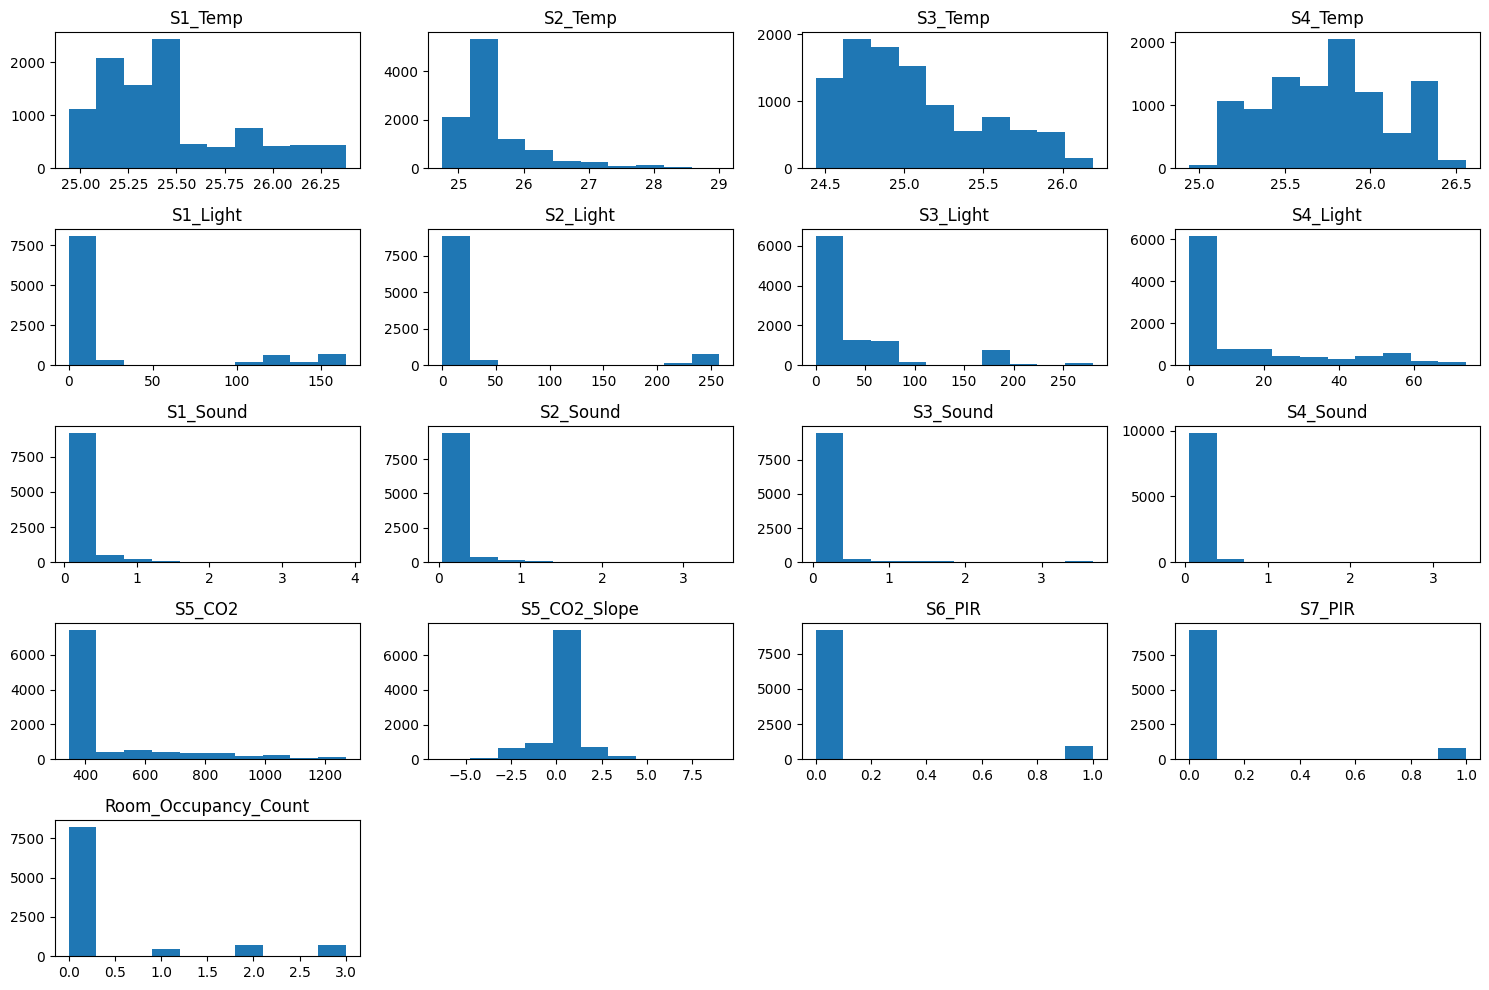

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


In [12]:
original_dataset = OccupancyEstimationDataloader('dataset/Occupancy_Estimation.csv')
print("Dataset length:", len(original_dataset))
original_df = original_dataset.dataframe
Visualization.visualize_distributions(original_df[original_df.columns[2:]], 5, 4)
original_df.head(n=10)

#### 1.2. After date & time preprocessing

Dataset length: 5238


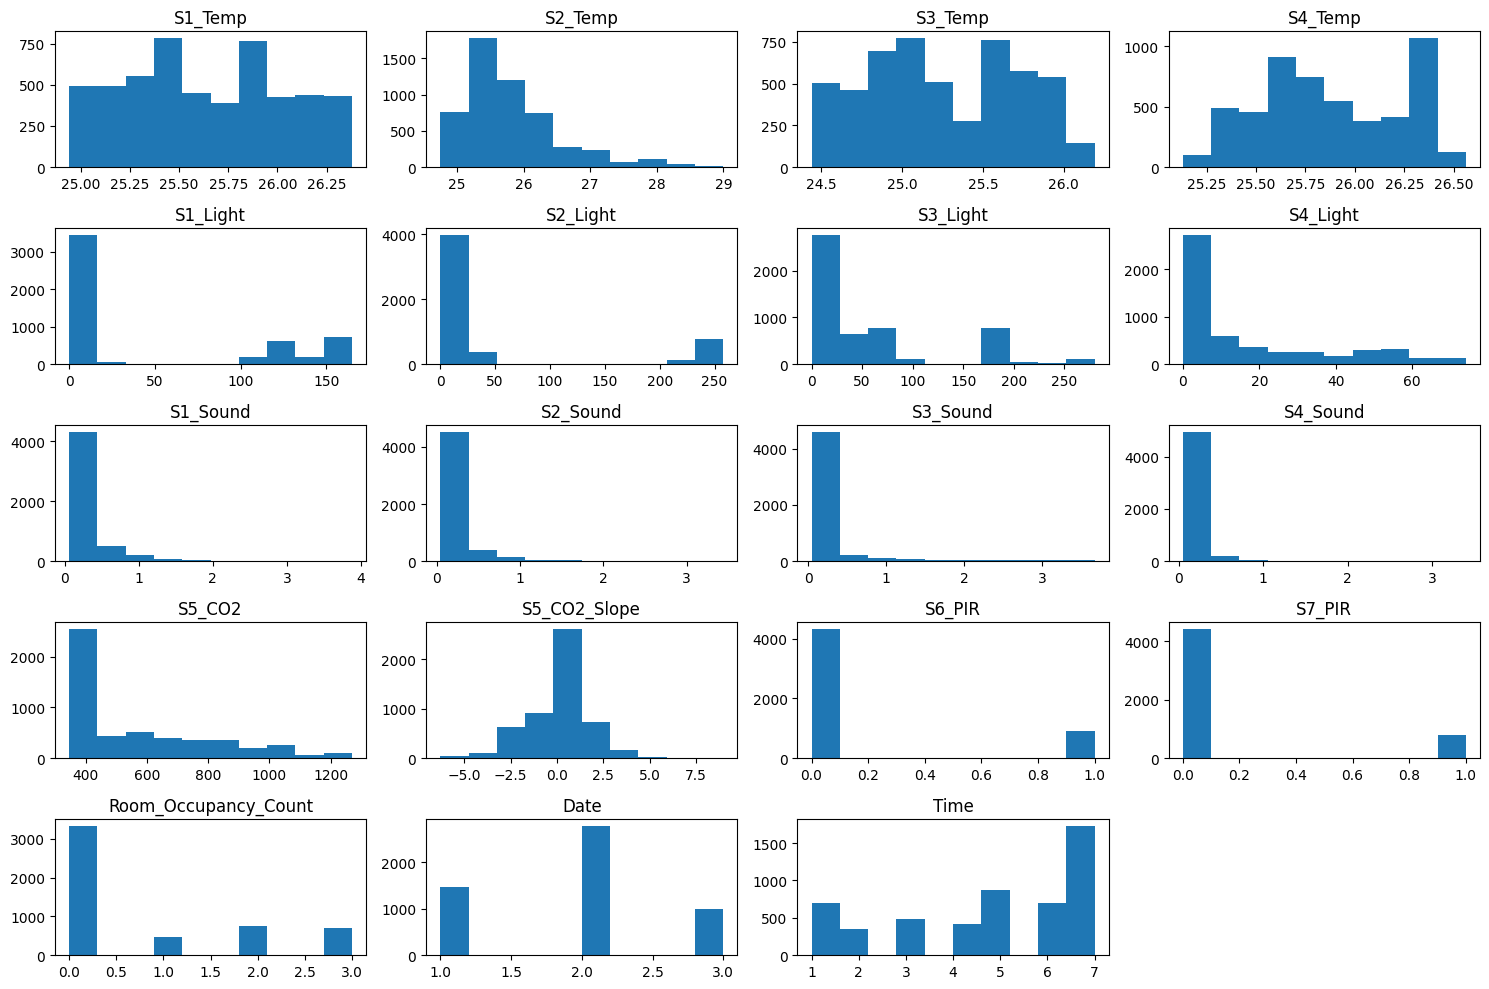

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,1,3,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,1,3,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,1,3,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,1,3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,1,3,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,1,3,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,1,3,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,1,3,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,1,3,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,1,3,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


In [31]:
dataset = OccupancyEstimationDataloader('dataset/Occupancy_Estimation.csv', DateAndTimePreprocessor.process)
print("Dataset length:", len(dataset))
df = dataset.dataframe
input_columns = dataset.input_columns
output_column = dataset.output_column
Visualization.visualize_distributions(df[list(df.columns[2:]) + list(df.columns[:2])], 5, 4)
df.head(n=10)

### 2. Analysis of the features used in learning

#### 2.1. Correlation

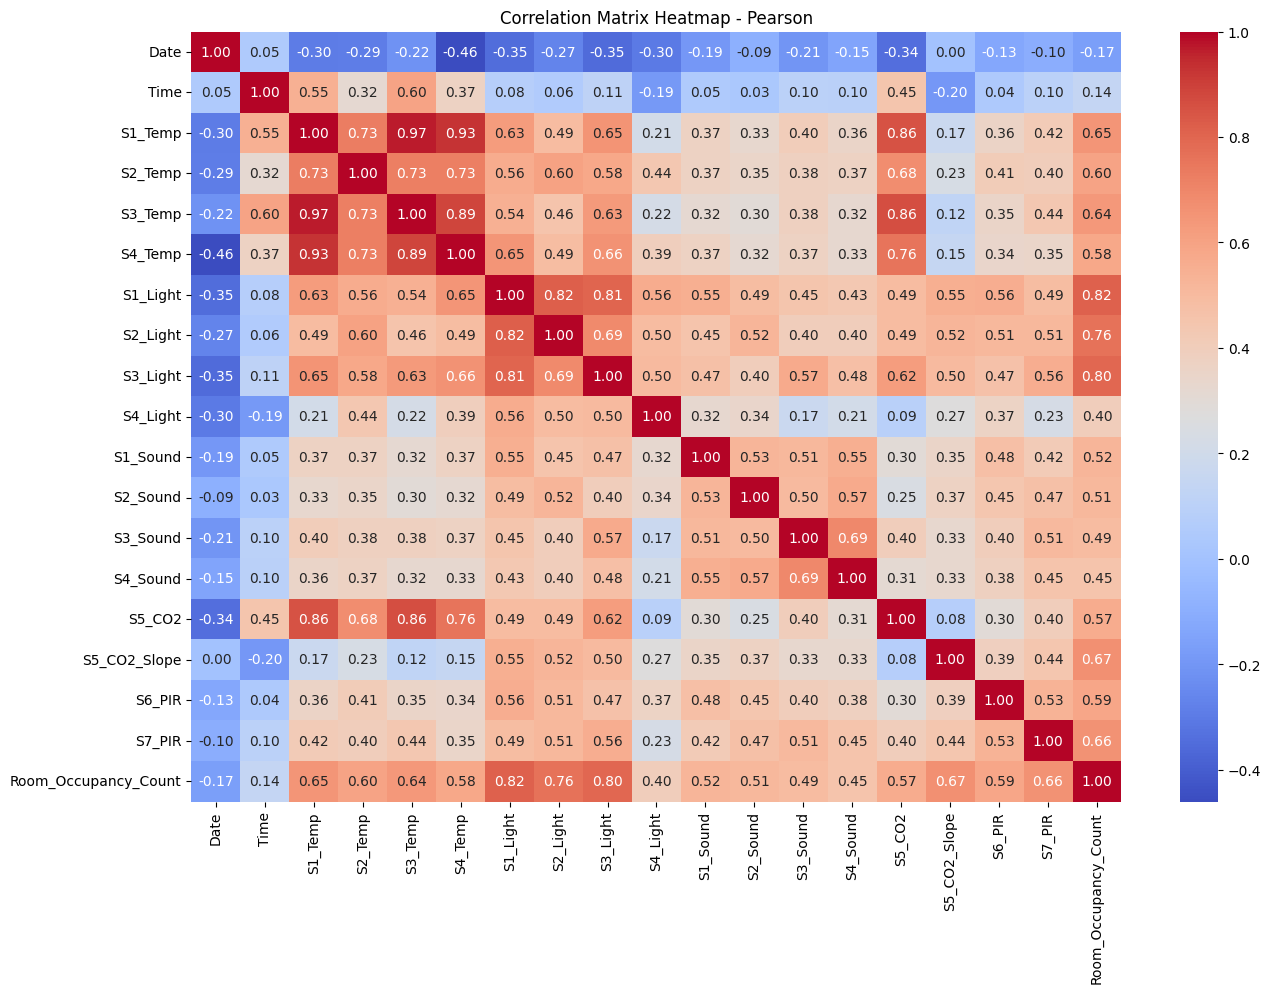

In [32]:
correlation_matrix = StatisticalTests.correlation_matrix(df, method="pearson")
Visualization.visualize_matrix_heatmap(correlation_matrix, title="Correlation Matrix Heatmap - Pearson")

In [ ]:
correlation_matrix = StatisticalTests.correlation_matrix(df, method="spearman")
Visualization.visualize_matrix_heatmap(correlation_matrix, title="Correlation Matrix Heatmap - Spearman")

#### 2.2. Independence

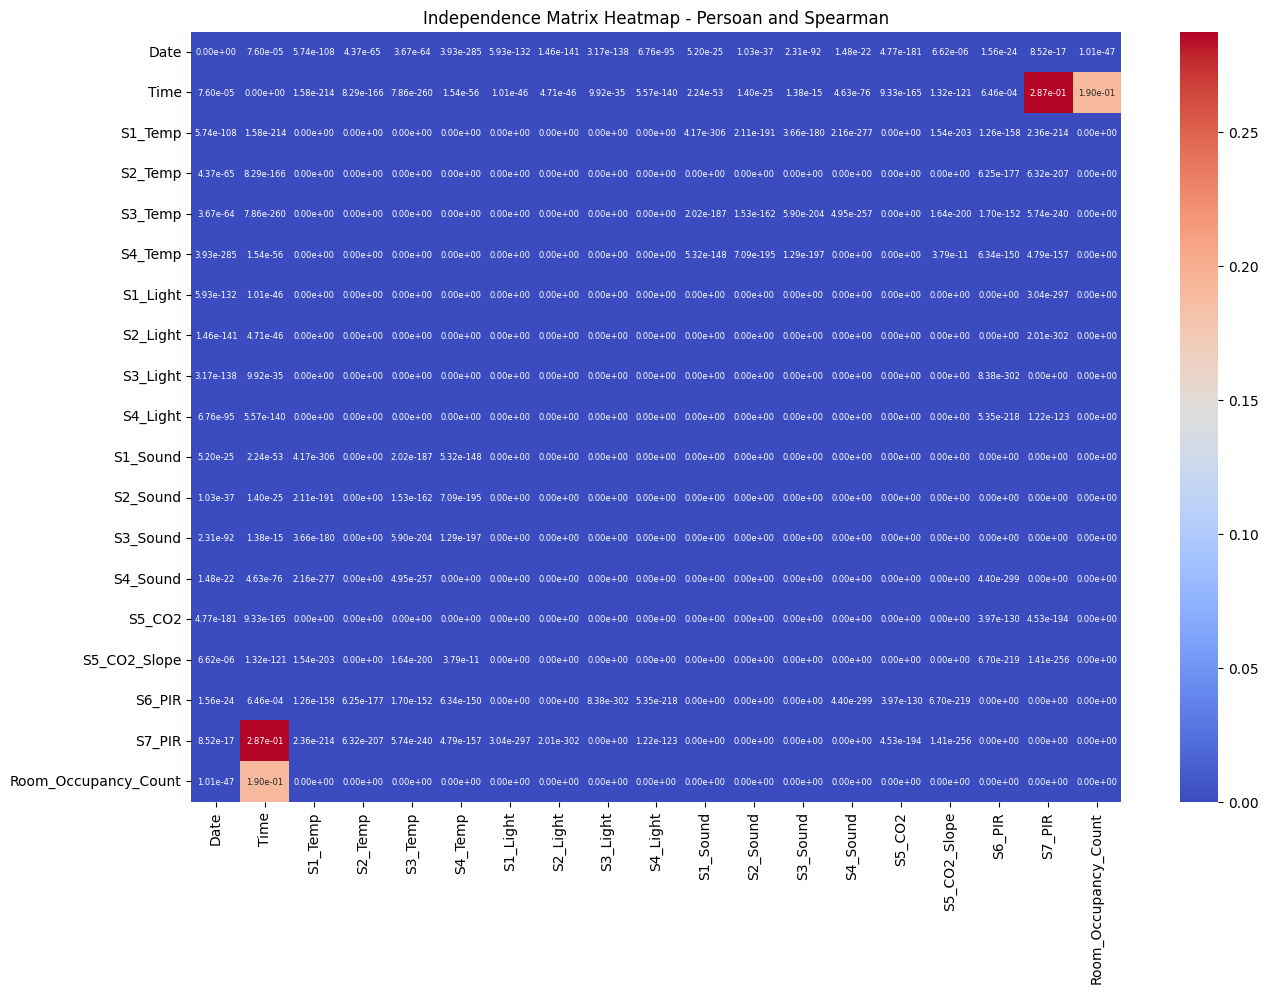

In [6]:
independence_matrix = StatisticalTests.independence_matrix(df)
Visualization.visualize_matrix_heatmap(
    independence_matrix, title="Independence Matrix Heatmap - Persoan and Spearman", exponential_notation=True
)

### 3. Data statistics

In [7]:
df.describe()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000
mean,1.911226,4.933372,25.637215,25.805330,25.248790,25.875286,46.539137,47.234632,53.259068,16.464108,0.255218,0.185132,0.248942,0.118839,561.044292,-0.005308,0.172967,0.153876,0.770714
std,0.679457,2.298921,0.391087,0.713122,0.465654,0.353718,63.917014,88.274630,72.951732,21.314089,0.422144,0.358403,0.560060,0.165674,237.713830,1.619408,0.378255,0.360864,1.121392
min,1.000000,1.000000,24.940000,24.750000,24.440000,25.130000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,1.000000,3.000000,25.310000,25.310000,24.880000,25.630000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,365.000000,-0.525000,0.000000,0.000000,0.000000
50%,2.000000,5.000000,25.630000,25.630000,25.190000,25.810000,3.000000,4.000000,14.000000,7.000000,0.080000,0.050000,0.060000,0.070000,450.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,7.000000,25.940000,26.130000,25.630000,26.250000,118.000000,25.000000,74.000000,29.000000,0.210000,0.130000,0.130000,0.090000,720.000000,0.625962,0.000000,0.000000,2.000000
max,3.000000,8.000000,26.380000,29.000000,26.190000,26.560000,165.000000,258.000000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


### 4. Data visualization

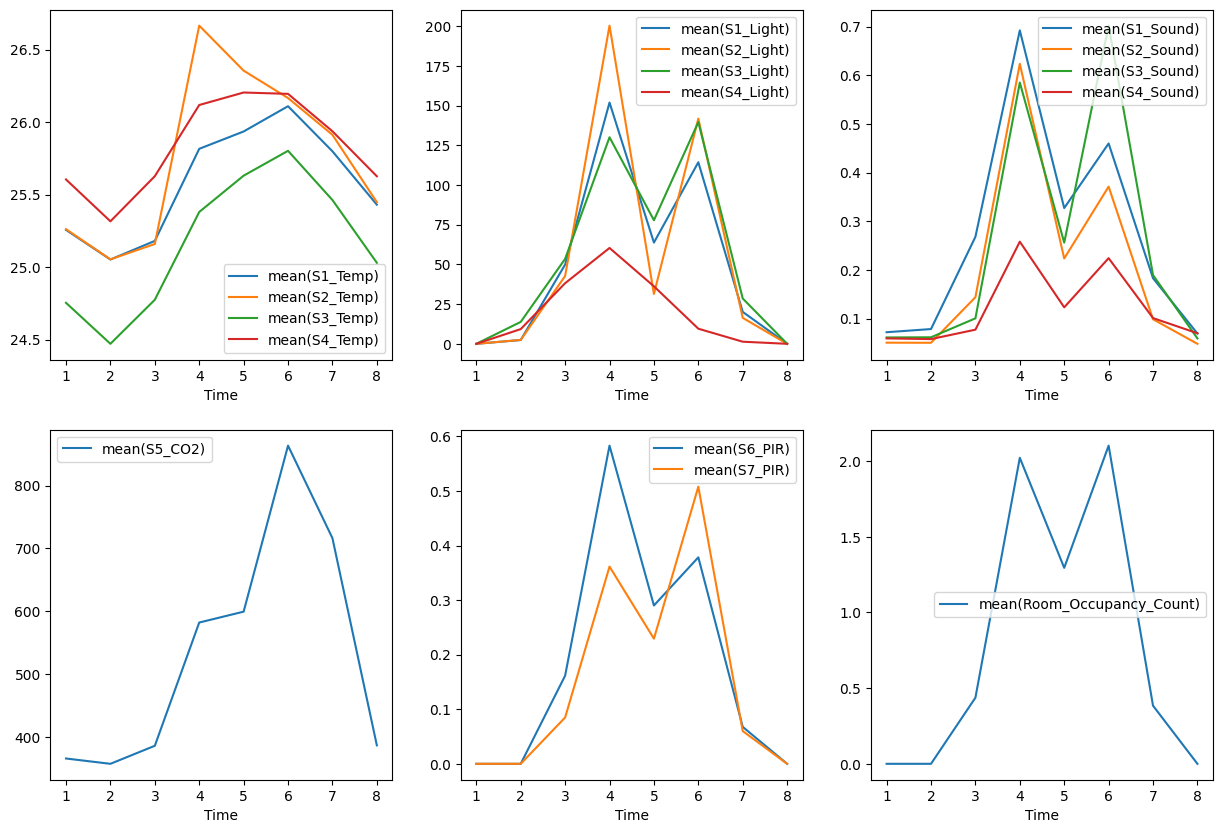

In [28]:
sensor_types = ['Temp', 'Light', 'Sound', 'CO2', 'PIR', 'Room_Occupancy_Count']
times = sorted(set(df['Time']))

plt.figure(figsize=Visualization.FIG_SIZE)
for idx, sensor_type in enumerate(sensor_types, start=1):
    plt.subplot(2, 3, idx)
    corresponding_columns = [column for column in df.columns if column.endswith(sensor_type)]
    for column in corresponding_columns:
        values = []
        for time in times:
            mean_column = df[df['Time'] == time][column].mean()
            values.append(mean_column)
        plt.plot(times, values)
    plt.legend([f'mean({column})' for column in corresponding_columns])
    plt.xlabel('Time')
plt.show()

#### 4.2. Feature reduction plots

In [45]:
def visualize_reduced_dataset(algorithm: any, method_name: str | None = None):
    features = algorithm.fit_transform(df[input_columns])
    Visualization.visualize_reduced_dataset(features, df[output_column], method_name=method_name)

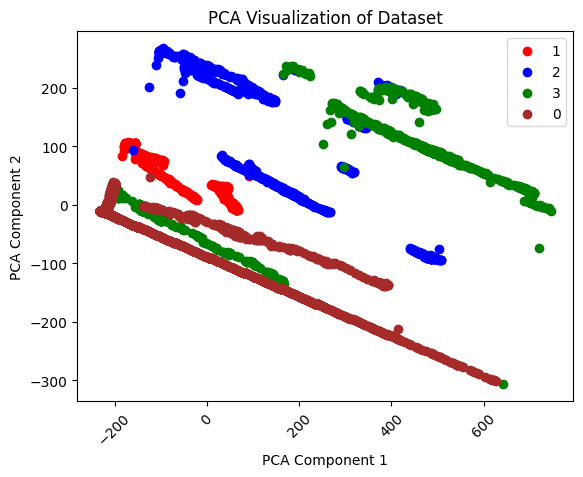

In [46]:
visualize_reduced_dataset(PCA(n_components=2), 'PCA')

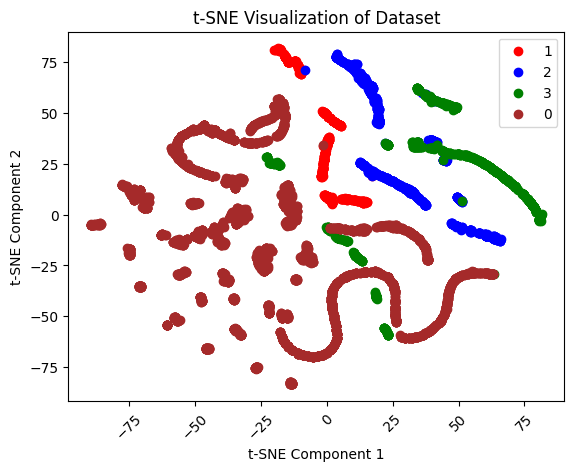

In [47]:
visualize_reduced_dataset(TSNE(n_components=2), 't-SNE')

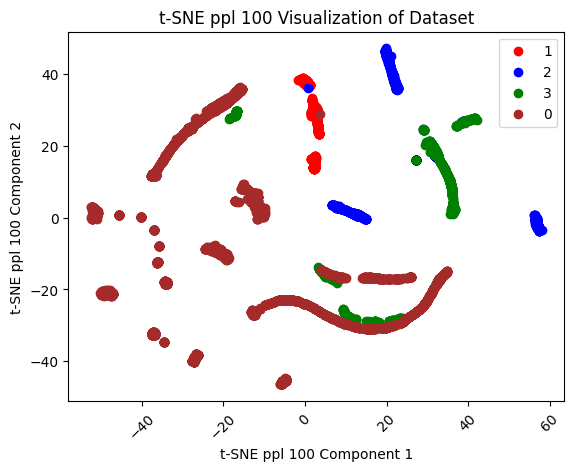

In [48]:
visualize_reduced_dataset(TSNE(n_components=2, perplexity=100), 't-SNE ppl 100')

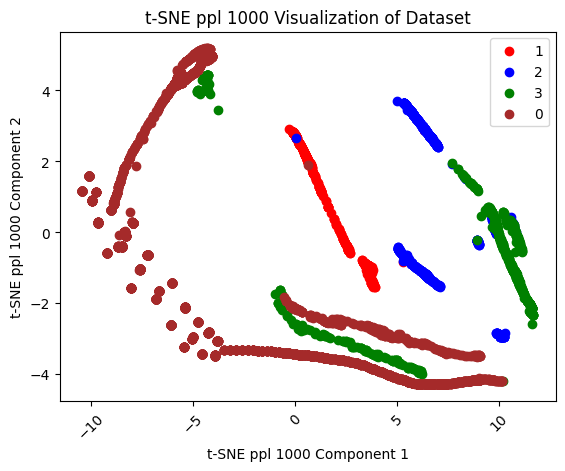

In [49]:
visualize_reduced_dataset(TSNE(n_components=2, perplexity=1000), 't-SNE ppl 1000')